In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def compostos_per(a,n,i,C): #a: numer de aplicacoes, #n: periodo, #i:taxa, #C: valor total p aplicar
    c = C/a #valor de cada aplicacao  
    m = n/a #intervalo entre cada aplicacao   
    lista=[] #lista com o taxas+1 dos periodos
    for j in range(a):
        mp=n-j*m#peridodo de cada aplicacao
        if j ==0 :    
            r = (1+i/100)**mp
            lista.append(r)
        else:
            r = lista[j-1] + (1+i/100)**mp 
            lista.append(r)
    M = c*(lista[-1]) #montante
    return lista, M

def inflacao_reg(c,g): # c= lista com taxas de inflacao, #g: grau da regressao
    x = np.linspace(0,len(c),len(c))
    regcoef = np.polyfit(x, c, g)
    reg = np.poly1d(regcoef)
    return reg, regcoef

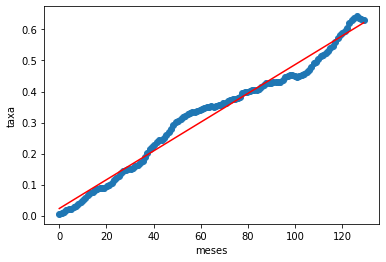

In [ ]:
#%%inflacao

X = np.array(pd.read_csv(r"/content/drive/Shareddrives/Projeto 1 MS317 - 2022/ICPA_MesaMes.csv", decimal=','))#importar os dados
dados= X[:,1]

dados_acumulados=[]

for i in range(len(dados)):
    if i ==0:
        r=float(dados[i])
        dados_acumulados.append(r)
    else:
        r=dados_acumulados[i-1]+float(dados[i])
        dados_acumulados.append(r)

#print(dados) %% Apenas para checar se os dados foram formatados corretamente

x=np.linspace(0,len(X),len(X))
plt.scatter(x,dados_acumulados)
reg = inflacao_reg(list(dados_acumulados),1)[0] # regressao da inflacao
plt.plot(x,reg(x),"r")
plt.xlabel('meses'), plt.ylabel('taxa')
#print("erro=",np.linalg.norm(reg(x)-dados))
coeficientes = inflacao_reg(list(dados_acumulados),1)[1]
plt.savefig("/content/drive/Shareddrives/Projeto 1 MS317 - 2022/Inflação Acumulada & Regressão.png", dpi=1200)
plt.show()

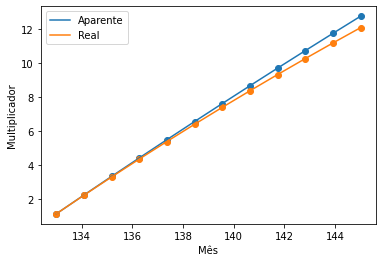

Montante aparente: 30601.73040763805 
Montante real: 28987.64123641347
Multiplicador aparente: 12.750721003182521 
Multiplicador real: 12.078183848505612
Juros aparente: 6.256008359854337 % 
Juros real: 0.651532070880112 %


In [ ]:
#%%dados do problema
n = 12      # Periodo da aplicacao
i = 0.93    # Taxa de Juros da aplicacao
C = 28800   # Montante desejado
a = 12      # Aportes periodicos

t = np.linspace(133, 133+n, n)
#%%
aparente = compostos_per(a,n,i,C)[0]       # Define o multiplicador aparente (Considerando apenas o rendimento da aplicacao)
inflacao = reg(t)                          # Define o valor da inflacao do mes t segundo a funcao obtida pela regressao linear
inflacao -= inflacao[0]                    # Define o mes 134 (jan/2023) como referencia das inflacoes seguintes
real = [ aparente[j]/(1 + inflacao[j]) for j in range(n)  ]   # Define o multiplicador real (Descontando a inflacao)

#%%
# plt.plot(t,reg(t)+1,label='inflação')
plt.plot(t,aparente,label='Aparente')
plt.scatter(t,aparente)
plt.plot(t,real,label='Real')
plt.scatter(t,real)
plt.xlabel('Mês'), plt.ylabel('Multiplicador')
plt.legend()
plt.savefig("/content/drive/Shareddrives/Projeto 1 MS317 - 2022/Juros Real & Aparente.png", dpi=1200)
plt.show()
#%%
m_ap=(compostos_per(a,n,i,C)[0])[-1]
m_R=real[-1]
M_ap=compostos_per(a,n,i,C)[1]
M_R=real[-1]*C/a
i_ap=(M_ap/C-1)*100
i_R=(M_R/C - 1)*100
print("Montante aparente:",M_ap,"\nMontante real:",M_R)
print("Multiplicador aparente:",m_ap,"\nMultiplicador real:",m_R) #em relacao a parcela periodica
print("Juros aparente:",i_ap,"%","\nJuros real:",i_R,"%") # em relacao ao total investido
#%%


In [ ]:

soma = 0.0
for i in inflacao:
  soma += i

print(inflacao)
print("\nInflação acumulada projetada em dez/2023", soma)

#print(real)
#print(aparente)
#print(inflacao)
#print(dados)
#print(reg(1))
#print(dados_acumulados)

[0.         0.005062   0.010124   0.01518599 0.02024799 0.02530999
 0.03037199 0.03543399 0.04049598 0.04555798 0.05061998 0.05568198]

Inflação acumulada projetada em dez/2023 0.3340918617131927
